Within this notebook we will look at an example Regression problem. We will try to predict "nihtbx_picvocab_agecorrected" scores.

# Init Phase

In [1]:
from ABCD_ML import ABCD_ML, Load
import os

Using TensorFlow backend.


In [2]:
base_dr = '/mnt/sdb2/'

# This is the 2.0.1 release dr, we'll load data from it
nda_dr1 = os.path.join(base_dr, 'ABCDFixRelease2p0p1')

# This is the 2.0 release dr, we'll load targets from it
nda_dr2 = os.path.join(base_dr, 'ABCD2p0NDA')

# We will use the gordon ROI resting state fMRI correlations as our data
data_loc = os.path.join(nda_dr1, 'abcd_betnet02.txt')

# This file contains the NIH toolbox scores
target_loc = os.path.join(nda_dr2, 'abcd_tbss01.txt')

In [3]:
# A lot of these are default values, but just showing everything as an example,
# See the docs / init help string for actual explanation
ML = ABCD_ML(exp_name = 'Pic_Vocab',
             log_dr = '',
             existing_log = 'overwrite',
             verbose = True,
             notebook = True,
             use_abcd_subject_ids = True,
             low_memory_mode = False,
             random_state = 1)

exp_name = Pic_Vocab
log_dr = /home/sage/ABCD_ML/Examples
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/Pic_Vocab
log file at: /home/sage/ABCD_ML/Examples/Pic_Vocab/logs.txt
notebook = True
use_abcd_subject_ids = True
low memory mode = False
strat_u_name = _Strat
random state = 1
ABCD_ML object initialized


# Loading Phase

We can start by defining any default loading params.

In [4]:
ML.Set_Default_Load_Params(dataset_type = 'basic',
                           subject_id = 'src_subject_id',
                           eventname = 'baseline_year_1_arm_1',
                           eventname_col = 'eventname',
                           overlap_subjects = False,
                           drop_na = True)

No default na_values passed, set to ["777", "999"]
No default drop_or_na passed, set to "drop"
Default load params set within self.default_load_params.



We next load any exclusion or inclusion specific subjects, since if loaded before data or covars, ect... the excluded subjects will be removed when loading data, targets, ect... as loaded before any drop behavior based on values. For example, when computing different filter_outliers, or dropping columns ect... this way it will only consider the non-excluded subjects. For exclusions we will load in subjects from philips scanners.

In [5]:
ML.Load_Exclusions(loc = 'philips.txt')

Total excluded subjects:  1513
Removed excluded subjects from loaded dfs


In [6]:
ML.Load_Data(loc = data_loc)

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_betnet02.txt  with dataset type: basic
dropped ['collection_id', 'abcd_betnet02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'rsfmri_c_ngd_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 0 cols for all missing values
Dropped 565 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

Processing unique col values with drop threshold: 0 - warn threshold: 449.90000000000003 - out of 8998 rows
Warn - rsfmri_c_ngd_tr has unique vals: 6
Warn - rsfmri_c_ngd_numtrs has unique vals: 116
Warn - rsfmri_c_ngd_nvols has unique vals: 105

loaded shape:  (8998, 181)

Total valid overlapping subjects = 8998



Lets take a quick look at the loaded data, as we have some warning columns which do not look like data, which is an indicator that we want to remove some columns

In [7]:
list(ML.data)

['rsfmri_c_ngd_tr',
 'rsfmri_c_ngd_numtrs',
 'rsfmri_c_ngd_nvols',
 'rsfmri_c_ngd_stnvols',
 'rsfmri_c_ngd_stcontignvols',
 'rsfmri_c_ngd_ntpoints',
 'rsfmri_c_ngd_meanmotion',
 'rsfmri_c_ngd_maxmotion',
 'rsfmri_c_ngd_meantrans',
 'rsfmri_c_ngd_maxtrans',
 'rsfmri_c_ngd_meanrot',
 'rsfmri_c_ngd_maxrot',
 'rsfmri_c_ngd_ad_ngd_ad',
 'rsfmri_c_ngd_ad_ngd_cgc',
 'rsfmri_c_ngd_ad_ngd_ca',
 'rsfmri_c_ngd_ad_ngd_dt',
 'rsfmri_c_ngd_ad_ngd_dla',
 'rsfmri_c_ngd_ad_ngd_fo',
 'rsfmri_c_ngd_ad_ngd_n',
 'rsfmri_c_ngd_ad_ngd_rspltp',
 'rsfmri_c_ngd_ad_ngd_smh',
 'rsfmri_c_ngd_ad_ngd_smm',
 'rsfmri_c_ngd_ad_ngd_sa',
 'rsfmri_c_ngd_ad_ngd_vta',
 'rsfmri_c_ngd_ad_ngd_vs',
 'rsfmri_c_ngd_cgc_ngd_ad',
 'rsfmri_c_ngd_cgc_ngd_cgc',
 'rsfmri_c_ngd_cgc_ngd_ca',
 'rsfmri_c_ngd_cgc_ngd_dt',
 'rsfmri_c_ngd_cgc_ngd_dla',
 'rsfmri_c_ngd_cgc_ngd_fo',
 'rsfmri_c_ngd_cgc_ngd_n',
 'rsfmri_c_ngd_cgc_ngd_rspltp',
 'rsfmri_c_ngd_cgc_ngd_smh',
 'rsfmri_c_ngd_cgc_ngd_smm',
 'rsfmri_c_ngd_cgc_ngd_sa',
 'rsfmri_c_ngd_cgc_ngd_vta',
 'rsfmri_c_ngd_cgc_ngd_vs',
 'rsfmri_c_ngd_ca_ngd_ad',
 'rsfmri_c_ngd_ca_ngd_cgc',
 'rsfmri_c_ngd_ca_ngd_ca',
 'rsfmri_c_ngd_ca_ngd_dt',
 'rsfmri_c_ngd_ca_ngd_dla',
 'rsfmri_c_ngd_ca_ngd_fo',
 'rsfmri_c_ngd_ca_ngd_n',
 'rsfmri_c_ngd_ca_ngd_rspltp',
 'rsfmri_c_ngd_ca_ngd_smh',
 'rsfmri_c_ngd_ca_ngd_smm',
 'rsfmri_c_ngd_ca_ngd_sa',
 'rsfmri_c_ngd_ca_ngd_vta',
 'rsfmri_c_ngd_ca_ngd_vs',
 'rsfmri_c_ngd_dt_ngd_ad',
 'rsfmri_c_ngd_dt_ngd_cgc',
 'rsfmri_c_ngd_dt_ngd_ca',
 'rsfmri_c_ngd_dt_ngd_dt',
 'rsfmri_c_ngd_dt_ngd_dla',
 'rsfmri_c_ngd_dt_ngd_fo',
 'rsfmri_c_ngd_dt_ngd_n',
 'rsfmri_c_ngd_dt_ngd_rspltp',
 'rsfmri_c_ngd_dt_ngd_smh',
 'rsfmri_c_ngd_dt_ngd_smm',
 'rsfmri_c_ngd_dt_ngd_sa',
 'rsfmri_c_ngd_dt_ngd_vta',
 'rsfmri_c_ngd_dt_ngd_vs',
 'rsfmri_c_ngd_dla_ngd_ad',
 'rsfmri_c_ngd_dla_ngd_cgc',
 'rsfmri_c_ngd_dla_ngd_ca',
 'rsfmri_c_ngd_dla_ngd_dt',
 'rsfmri_c_ngd_dla_ngd_dla',
 'rsfmri_c_ngd_dla_ngd_fo',
 'rsfmri_c_ngd_dla_ngd_n',
 'rsfmri_c_ngd_dla_ngd_rspltp',
 'rsfmri_c_ngd_dla_ngd_smh',
 'rsfmri_c_ngd_dla_ngd_smm',
 'rsfmri_c_ngd_dla_ngd_sa',
 'rsfmri_c_ngd_dla_ngd_vta',
 'rsfmri_c_ngd_dla_ngd_vs',
 'rsfmri_c_ngd_fo_ngd_ad',
 'rsfmri_c_ngd_fo_ngd_cgc',
 'rsfmri_c_ngd_fo_ngd_ca',
 'rsfmri_c_ngd_fo_ngd_dt',
 'rsfmri_c_ngd_fo_ngd_dla',
 'rsfmri_c_ngd_fo_ngd_fo',
 'rsfmri_c_ngd_fo_ngd_n',
 'rsfmri_c_ngd_fo_ngd_rspltp',
 'rsfmri_c_ngd_fo_ngd_smh',
 'rsfmri_c_ngd_fo_ngd_smm',
 'rsfmri_c_ngd_fo_ngd_sa',
 'rsfmri_c_ngd_fo_ngd_vta',
 'rsfmri_c_ngd_fo_ngd_vs',
 'rsfmri_c_ngd_n_ngd_ad',
 'rsfmri_c_ngd_n_ngd_cgc',
 'rsfmri_c_ngd_n_ngd_ca',
 'rsfmri_c_ngd_n_ngd_dt',
 'rsfmri_c_ngd_n_ngd_dla',
 'rsfmri_c_ngd_n_ngd_fo',
 'rsfmri_c_ngd_n_ngd_n',
 'rsfmri_c_ngd_n_ngd_rspltp',
 'rsfmri_c_ngd_n_ngd_smh',
 'rsfmri_c_ngd_n_ngd_smm',
 'rsfmri_c_ngd_n_ngd_sa',
 'rsfmri_c_ngd_n_ngd_vta',
 'rsfmri_c_ngd_n_ngd_vs',
 'rsfmri_c_ngd_rspltp_ngd_ad',
 'rsfmri_c_ngd_rspltp_ngd_cgc',
 'rsfmri_c_ngd_rspltp_ngd_ca',
 'rsfmri_c_ngd_rspltp_ngd_dt',
 'rsfmri_c_ngd_rspltp_ngd_dla',
 'rsfmri_c_ngd_rspltp_ngd_fo',
 'rsfmri_c_ngd_rspltp_ngd_n',
 'rsfmri_c_ngd_rspltp_ngd_rspltp',
 'rsfmri_c_ngd_rspltp_ngd_smh',
 'rsfmri_c_ngd_rspltp_ngd_smm',
 'rsfmri_c_ngd_rspltp_ngd_sa',
 'rsfmri_c_ngd_rspltp_ngd_vta',
 'rsfmri_c_ngd_rspltp_ngd_vs',
 'rsfmri_c_ngd_smh_ngd_ad',
 'rsfmri_c_ngd_smh_ngd_cgc',
 'rsfmri_c_ngd_smh_ngd_ca',
 'rsfmri_c_ngd_smh_ngd_dt',
 'rsfmri_c_ngd_smh_ngd_dla',
 'rsfmri_c_ngd_smh_ngd_fo',
 'rsfmri_c_ngd_smh_ngd_n',
 'rsfmri_c_ngd_smh_ngd_rspltp',
 'rsfmri_c_ngd_smh_ngd_smh',
 'rsfmri_c_ngd_smh_ngd_smm',
 'rsfmri_c_ngd_smh_ngd_sa',
 'rsfmri_c_ngd_smh_ngd_vta',
 'rsfmri_c_ngd_smh_ngd_vs',
 'rsfmri_c_ngd_smm_ngd_ad',
 'rsfmri_c_ngd_smm_ngd_cgc',
 'rsfmri_c_ngd_smm_ngd_ca',
 'rsfmri_c_ngd_smm_ngd_dt',
 'rsfmri_c_ngd_smm_ngd_dla',
 'rsfmri_c_ngd_smm_ngd_fo',
 'rsfmri_c_ngd_smm_ngd_n',
 'rsfmri_c_ngd_smm_ngd_rspltp',
 'rsfmri_c_ngd_smm_ngd_smh',
 'rsfmri_c_ngd_smm_ngd_smm',
 'rsfmri_c_ngd_smm_ngd_sa',
 'rsfmri_c_ngd_smm_ngd_vta',
 'rsfmri_c_ngd_smm_ngd_vs',
 'rsfmri_c_ng

Alright, the obvious problem is that we have a number of columns that we most likely dont want to include. Specifically, there are a number of descriptors, e.g., number of trials, which we don't want, because they are not neuroimaging ROIs. We just want to grab the correlations.
Let's clear the data and reload it, explicitly telling the data loader to drop those keys. We can also note that there are are 13 different networks, and then the correlations between all of them.
auditory, cingulooperc, cinguloparietal,
default, dorsalattn, frontoparietal,
none, retrosplenialtemporal, smhand, smmouth,
salience, ventralattn, visual

This means there are just 91 ((14 * (14-1) / 2)), unique correlations, but we have 169 columns loaded, which means there are repeats. This is likely because each correlation was computed both ways, so there are 13 correlations with each network to another (including itself). Lucklily all we need to do is just specify drop_col_duplicates, and just make sure we end up with 91 unique columns.

In [8]:
to_drop = list(ML.data)[:12]
to_drop

['rsfmri_c_ngd_tr',
 'rsfmri_c_ngd_numtrs',
 'rsfmri_c_ngd_nvols',
 'rsfmri_c_ngd_stnvols',
 'rsfmri_c_ngd_stcontignvols',
 'rsfmri_c_ngd_ntpoints',
 'rsfmri_c_ngd_meanmotion',
 'rsfmri_c_ngd_maxmotion',
 'rsfmri_c_ngd_meantrans',
 'rsfmri_c_ngd_maxtrans',
 'rsfmri_c_ngd_meanrot',
 'rsfmri_c_ngd_maxrot']

In [9]:
ML.Load_Data(loc = data_loc,
             drop_keys = to_drop,
             drop_col_duplicates = .99,
             clear_existing = True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_betnet02.txt  with dataset type: basic
dropped ['collection_id', 'abcd_betnet02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'rsfmri_c_ngd_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 12 columns per passed drop_keys argument
Dropped 0 cols for all missing values
Dropped 512 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

Dropped 78 columns as duplicate cols!
loaded shape:  (9051, 91)

Total valid overlapping subjects = 9051



Great, now we have the right number of columns, let view the distribution of some of them next to make sure everything looks okay, e.g., no severe outliers. We can also look at the skew for this.

In [10]:
ML.Show_Data_Dist()

Set to overlapping loaded subjects.
Loaded data top columns by skew:
rsfmri_c_ngd_ca_ngd_vta    -1.302782
rsfmri_c_ngd_dt_ngd_vs     -1.167616
rsfmri_c_ngd_ad_ngd_fo     -1.121172
rsfmri_c_ngd_ad_ngd_dla    -1.080239
rsfmri_c_ngd_fo_ngd_vs     -1.053548
                              ...   
rsfmri_c_ngd_smh_ngd_smh    1.810546
rsfmri_c_ngd_ad_ngd_smm     1.868971
rsfmri_c_ngd_ad_ngd_ad      2.088916
rsfmri_c_ngd_n_ngd_n        2.139101
rsfmri_c_ngd_dt_ngd_fo      2.667332
Length: 91, dtype: float64


We can take a look at how dropping a few extreme values changes this distribution.

In [11]:
ML.Load_Data(loc = data_loc,
             drop_keys = to_drop,
             drop_col_duplicates = .99,
             filter_outlier_std = 10, # Any datapoint with a col with a value more than 10 std in either direction is dropped
             clear_existing = True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_betnet02.txt  with dataset type: basic
dropped ['collection_id', 'abcd_betnet02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'rsfmri_c_ngd_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 12 columns per passed drop_keys argument
Dropped 0 cols for all missing values
Dropped 512 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Dropped 71 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

Dropped 78 columns as duplicate cols!
loaded shape:  (8980, 91)

Total valid overlapping subjects = 8980



In [12]:
ML.Show_Data_Dist()

Set to overlapping loaded subjects.
Loaded data top columns by skew:
rsfmri_c_ngd_dt_ngd_vs     -0.782240
rsfmri_c_ngd_n_ngd_smm     -0.635791
rsfmri_c_ngd_fo_ngd_vs     -0.614417
rsfmri_c_ngd_vta_ngd_vs    -0.608839
rsfmri_c_ngd_ad_ngd_dt     -0.448981
                              ...   
rsfmri_c_ngd_dla_ngd_smh    0.951387
rsfmri_c_ngd_ad_ngd_cgc     1.016040
rsfmri_c_ngd_n_ngd_vta      1.082616
rsfmri_c_ngd_smh_ngd_smh    1.315534
rsfmri_c_ngd_n_ngd_n        1.544452
Length: 91, dtype: float64


We only dropped 71 more subjects and things already look a lot better. This is good enough for now, though we might want to mess around with different scaling options later on.

Okay, now lets load our targets and some covars (just age + sex)

In [13]:
ML.Load_Targets(loc = target_loc,
                col_name = 'nihtbx_picvocab_agecorrected',
                data_type = 'float')

Loading /mnt/sdb2/ABCD2p0NDA/abcd_tbss01.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 125 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: nihtbx_picvocab_agecorrected

Final shape:  (10235, 1)

Total valid overlapping subjects = 8875

All loaded targets
0 : nihtbx_picvocab_agecorrected



Note how it says: "All loaded targets", this refers to being able to load multiple targets at once. Let's also load the uncorrected pic_vocab to show that functionality off.

In [14]:
ML.Load_Targets(loc = target_loc,
                col_name = 'nihtbx_picvocab_uncorrected',
                data_type = 'float')

Loading /mnt/sdb2/ABCD2p0NDA/abcd_tbss01.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 125 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: nihtbx_picvocab_uncorrected

Final shape:  (10235, 1)
Merged with existing!
New combined shape: (10235, 2)

Total valid overlapping subjects = 8875

All loaded targets
0 : nihtbx_picvocab_agecorrected
1 : nihtbx_picvocab_uncorrected



Set to overlapping loaded subjects.
-- nihtbx_picvocab_agecorrected --


,nihtbx_picvocab_agecorrected
count,8875.000000
mean,107.012620
std,16.772874
min,0.000000
25%,98.000000
50%,109.000000
75%,120.000000
max,208.000000


Num. of unique vals: 54



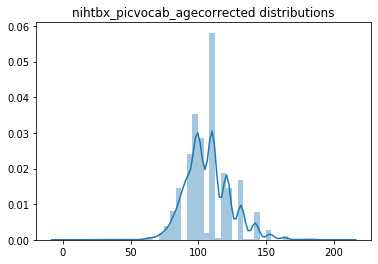


-- nihtbx_picvocab_uncorrected --


,nihtbx_picvocab_uncorrected
count,8875.000000
mean,84.608496
std,8.005448
min,29.000000
25%,80.000000
50%,84.000000
75%,90.000000
max,119.000000


Num. of unique vals: 69



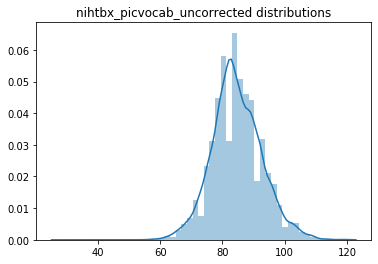

In [15]:
ML.Show_Targets_Dist()

For both of the loaded distributions there are some large outliers, lets create a neat sample for each where we keep datapoints that are within 5 std's of the mean. Note: what we are doing here is acting upon the whole dataset before any train/test split, therefore it is reccomended that at this stage any global actions should be reasonable... in this case it seems reasonable to remove subjects with scores that are likely just human input error.

cleared targets.

Loading /mnt/sdb2/ABCD2p0NDA/abcd_tbss01.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 125 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: nihtbx_picvocab_agecorrected
Filtering for outliers by stds: (5, 5)
Min-Max Score (before outlier filtering): 0.0 208.0
Min-Max Score (post outlier filtering): 31.0 188.0
loading: nihtbx_picvocab_uncorrected
Filtering for outliers by stds: (5, 5)
Min-Max Score (before outlier filtering): 29.0 119.0
Min-Max Score (post outlier filtering): 47.0 119.0

Dropped 4 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Final shape:  (10231, 2)

Total valid overlapping subjects = 8871

All loaded targets
0 : nihtbx_picvocab_agecorrected
1 : nihtbx_picvocab_uncorrected

Set to overlapping loaded subjects.
-- nihtbx_picvocab_agecorrected --


,nihtbx_picvocab_agecorrected
count,8871.000000
mean,107.015556
std,16.640754
min,31.000000
25%,98.000000
50%,109.000000
75%,120.000000
max,188.000000


Num. of unique vals: 50



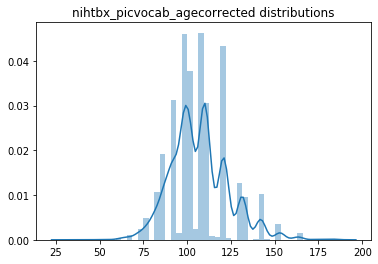


-- nihtbx_picvocab_uncorrected --


,nihtbx_picvocab_uncorrected
count,8871.000000
mean,84.612603
std,7.952485
min,47.000000
25%,80.000000
50%,84.000000
75%,90.000000
max,119.000000


Num. of unique vals: 66



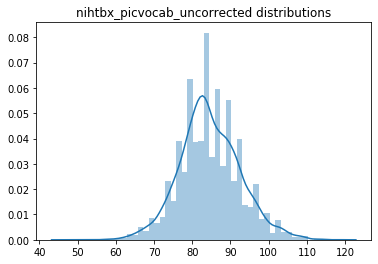

In [16]:
ML.Load_Targets(loc = target_loc,
                col_name = ['nihtbx_picvocab_agecorrected', 'nihtbx_picvocab_uncorrected'],
                data_type = ['f', 'f'],
                filter_outlier_std = 5,
                clear_existing = True)

ML.Show_Targets_Dist()

In [20]:
ML.Load_Covars(loc = data_loc,
               col_name = ['interview_age', 'sex'],
               data_type = ['f', 'b'])

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_betnet02.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
loading: interview_age
loading: sex
loaded shape:  (9562, 2)

Total valid overlapping subjects = 8871



Set to overlapping loaded subjects.
-- interview_age --


,interview_age
count,8871.000000
mean,119.097734
std,7.538449
min,107.000000
25%,112.000000
50%,119.000000
75%,126.000000
max,132.000000


Num. of unique vals: 26



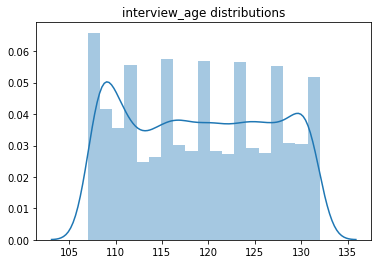


-- sex --


,Original Name,Counts,Frequency
Internal Name,,,
0,F,4295,0.484162
1,M,4576,0.515838


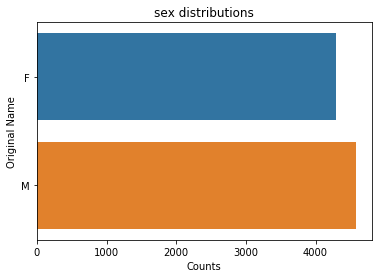

In [21]:
ML.Show_Covars_Dist()

We have now loaded:
-Exclusions
-Data, Targets and Covars

We could optionally load stratification values, but for this example, we will just use random cross validation.

# Validation Phase

Before defining the train test split, we would optionally define a validation strategy, but for this expiriment we are just going to use random splits, see some of the other examples for other things you can do here. We move on directly to defining a global train test split.

In [22]:
ML.Train_Test_Split(test_size=.25)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (8871, 95)
Performing split on 8871 subjects!
Test split size: 0.25

Performed train test split!
Train size: 6653
Test size:  2218


# Modeling Phase

The first step of the modelling phase is to go through and set all of the params which are likely to stay the same.

In [24]:
ML.Set_Default_ML_Params(problem_type='regression',
                         metric=['r2', 'mse'],
                         scaler='standard',
                         splits=3,
                         n_repeats=2,
                         search_splits=3,
                         n_jobs=4,
                         search_n_iter=50)

Default ML params set within self.default_ML_params.


Next we can play around with the different verbosity settings / levels, where we will just set everything to True for now, to show what kinds of output you can see (everything except the option to store all of the output in the logs!)

In [25]:
ML.Set_Default_ML_Verbosity(progress_bar = True,
                            fold_name = True,
                            time_per_fold = True,
                            score_per_fold = True,
                            fold_sizes = True,
                            save_to_logs = False)

The first step is ussually expirimenting with different models. We can see which are avaliable at https://abcd-ml.readthedocs.io/en/latest/options.html#regression or by calling ML.Show_Models(problem_type='regression').

In general, it is a good idea to try simple models first, and then move onto more complex things.

In [26]:
raw_scores, raw_preds, FIs = ML.Evaluate(model='linear')

Running Evaluate with:
target = 0
problem_type = regression
model = linear
model_params = 0
metric = ['r2', 'mse']
scaler = standard
scaler_scope = data
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 4
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: linear

Using: 93 feats



Repeat: 1/2 Fold: 1/3
Train subjects: 4435
Val/Test subjects: 2218
Calculate base feat importances
Time Elapsed: 00:00:00
val r2: 0.026409695820225898
val mean squared error: -267.89532801170327

Repeat: 1/2 Fold: 2/3
Train subjects: 4435
Val/Test subjects: 2218
Calculate base feat importances
Time Elapsed: 00:00:00
val r2: 0.05138305003782273
val mean squared error: -267.15655112247373

Repeat: 1/2 Fold: 3/3
Train subjects: 4436
Val/Test subjects: 2217
Calculate base feat importances
Time Elapsed: 00:00:00
val r2: 0.04081351026311253
val mean squared error: -246.87794890148265

Repeat: 2/2 Fold: 1/3
Train subjects: 4435
Val/Test subjects: 2218
Calculate base feat importances
Time Elapsed: 00:00:00
val r2: 0.07326689062744651
val mean squared error: -242.53142675338933

Repeat: 2/2 Fold: 2/3
Train subjects: 4435
Val/Test subjects: 2218
Calculate base feat importances
Time Elapsed: 00:00:00
val r2: 0.039016940624500895
val mean squared error: -256.1600277452191

Repeat: 2/2 Fold: 3/3
T

Two things are apparent right away, we have wayyy too much verbose output, and logistic regression doesn't do all that terrible, e.g., .043 r2.

In [27]:
ML.Set_Default_ML_Verbosity(progress_bar = True,
                            fold_name = False,
                            time_per_fold = False,
                            score_per_fold = False,
                            fold_sizes = False,
                            save_to_logs = False)

Moving up in complexity let's try an SVM model, with non linear kernel, ect...

In [28]:
raw_scores, raw_preds, FIs = ML.Evaluate(model='svm')

Running Evaluate with:
target = 0
problem_type = regression
model = svm
model_params = 0
metric = ['r2', 'mse']
scaler = standard
scaler_scope = data
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 4
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: svm




Validation Scores
_________________
Metric:  r2
Mean Validation score:  -0.005184420208596848
Macro Std in Validation score:  0.00016336581811648987
Micro Std in Validation score:  0.0018409593120994271

Metric:  mean squared error
Mean Validation score:  -272.78041753075627
Macro Std in Validation score:  0.02559800717560279
Micro Std in Validation score:  10.226028384907949



And... doesn't look great, but one thing to note is we did not do any parameter search, let's remedy this.

In [29]:
raw_scores, raw_preds, FIs = ML.Evaluate(model = 'svm',
                                         model_params = 1,
                                         search_type = 'RandomSearch')

Running Evaluate with:
target = 0
problem_type = regression
model = svm
model_params = 1
metric = ['r2', 'mse']
scaler = standard
scaler_scope = data
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 50
n_jobs = 4
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: svm0




Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.05452281879397225
Macro Std in Validation score:  0.0005372888137300524
Micro Std in Validation score:  0.010546522224288712

Metric:  mean squared error
Mean Validation score:  -256.61345742505137
Macro Std in Validation score:  0.15336851851432698
Micro Std in Validation score:  10.872470799421599



In [30]:
raw_scores, raw_preds, FIs = ML.Evaluate(model = 'elastic net',
                                         model_params = 1,
                                         search_type = 'RandomSearch')

Running Evaluate with:
target = 0
problem_type = regression
model = elastic net
model_params = 1
metric = ['r2', 'mse']
scaler = standard
scaler_scope = data
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 50
n_jobs = 4
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: elastic net




Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.044820048054145356
Macro Std in Validation score:  0.00017349810242922592
Micro Std in Validation score:  0.009175069207220408

Metric:  mean squared error
Mean Validation score:  -259.2661079910688
Macro Std in Validation score:  0.010789251373523712
Micro Std in Validation score:  11.377439713779221



In [31]:
raw_scores, raw_preds, FIs = ML.Evaluate(model = 'light gbm',
                                         model_params = 1,
                                         search_type = 'RandomSearch')

Running Evaluate with:
target = 0
problem_type = regression
model = light gbm
model_params = 1
metric = ['r2', 'mse']
scaler = standard
scaler_scope = data
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 50
n_jobs = 4
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: light gbm




Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.05240014874019607
Macro Std in Validation score:  0.0026770755108303512
Micro Std in Validation score:  0.013710415715357171

Metric:  mean squared error
Mean Validation score:  -257.24106796918977
Macro Std in Validation score:  0.7404707614919914
Micro Std in Validation score:  12.262998085707249



In [ ]:
raw_scores, raw_preds, FIs = ML.Evaluate(model = 'xgb',
                                         model_params = 1,
                                         search_type = 'RandomSearch')

Running Evaluate with:
target = 0
problem_type = regression
model = xgb
model_params = 1
metric = ['r2', 'mse']
scaler = standard
scaler_scope = data
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 50
n_jobs = 4
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: xgb

